In [50]:
# standard modules
import copy
import os
import re
from collections import OrderedDict
import warnings
import winsound
import time
import string

# 3rd party modules
import yaml
import holidays
import matplotlib.pyplot as plt
#plt.style.use('tableau-colorblind10')
#plt.rcParams["font.sans-serif"] = 'Arial'
#import scienceplots
#plt.style.use(['high-contrast', 'notebook'])
#plt.style.use('seaborn-v0_8-colorblind')
import matplotlib
from matplotlib import lines
pltline2d = lines.Line2D
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
from functools import reduce
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage as RPackage, importr
from rpy2.robjects import pandas2ri
from scripts.FFP_Python.calc_footprint_FFP_climatology import FFP_climatology
from shapely import geometry
from pyproj import Transformer

# Project modules
import scripts.coimbra2024_scripts as coimbra2024
#from scripts.coimbra2024_scripts import j2sj, sj2j, summarisestats, summarisestatslabel, summarisestatstext, isweekday, month2season
#from scripts import satelite
plt.style.use('coimbraetal')


In [14]:
all_flux_data = pd.read_file('data/FR-Gri_full_dataset.parquet')

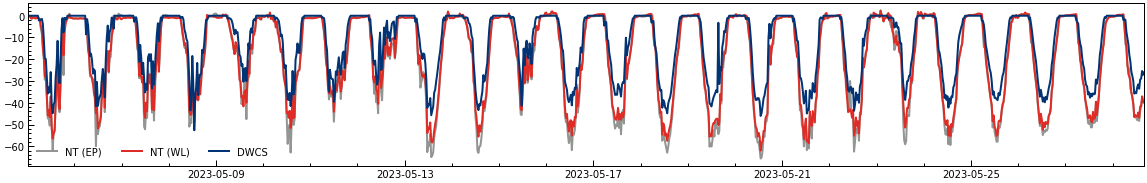

In [52]:
chunkdf = all_flux_data.copy()
chunkdf[chunkdf.NEE_DATA_FLAG==flag]
chunkdf = chunkdf[(chunkdf.TIMESTAMP > pd.to_datetime('20230505')) * (chunkdf.TIMESTAMP < pd.to_datetime('20230530'))]

plt.figure(figsize=(20,3))
plt.plot(chunkdf.TIMESTAMP, -chunkdf.GPP_NT_VUT_REF, label='NT (EP)')
plt.plot(chunkdf.TIMESTAMP, -chunkdf.GPP_NT_VUT_REF_WL, label='NT (WL)')
plt.plot(chunkdf.TIMESTAMP, chunkdf.GPP_DWCS*42, label='DWCS')
plt.xlim(min(chunkdf.TIMESTAMP), max(chunkdf.TIMESTAMP))
plt.legend(ncols=3)


(19482.020833333332, 19505.666666666668)

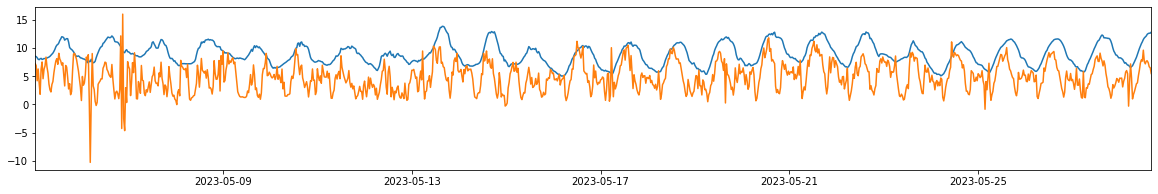

In [48]:
chunkdf = all_flux_data.copy()
chunkdf[chunkdf.NEE_DATA_FLAG==flag]
chunkdf = chunkdf[(chunkdf.TIMESTAMP > pd.to_datetime('20230505')) * (chunkdf.TIMESTAMP < pd.to_datetime('20230530'))]

plt.figure(figsize=(20,3))
plt.plot(chunkdf.TIMESTAMP, chunkdf.RECO_NT_VUT_REF)
plt.plot(chunkdf.TIMESTAMP, chunkdf.RECO_DWCS*42)
plt.xlim(min(chunkdf.TIMESTAMP), max(chunkdf.TIMESTAMP))


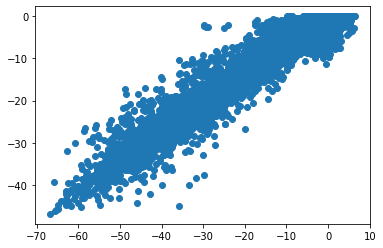

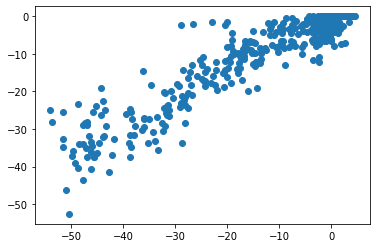

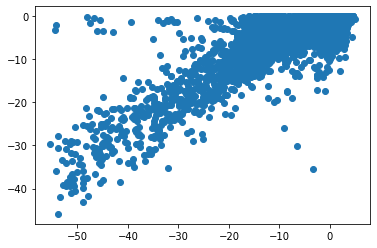

In [24]:
chunkdf = all_flux_data.copy()

for flag in [0,1,2]:
    plt.scatter(-chunkdf[chunkdf.NEE_DATA_FLAG==flag].GPP_NT_VUT_REF, chunkdf[chunkdf.NEE_DATA_FLAG==flag].GPP_DWCS * 42)
    plt.show()
